In [ ]:
####THANU SHREE
# @title Default title text
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os
from google.colab import files

In [ ]:
# Upload file from browser
print("Please upload the CSV file (e.g., Synthetic_Financial_datasets_Log.csv)")
uploaded = files.upload()

# List uploaded files to confirm
print("Available files:", list(uploaded.keys()))

# Use the first uploaded file (adjust if multiple files are uploaded)
file_name = list(uploaded.keys())[0]

# Load the dataset
try:
    df = pd.read_csv(file_name)
    print("Dataset Loaded. First 5 Rows:\n", df.head())
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found. Please check the file name and try again.")
except Exception as e:
    print(f"An error occurred: {e}")

Please upload the CSV file (e.g., Synthetic_Financial_datasets_Log.csv)


Saving Synthetic_Financial_datasets_log.csv to Synthetic_Financial_datasets_log.csv
Available files: ['Synthetic_Financial_datasets_log.csv']
Dataset Loaded. First 5 Rows:
    step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M12

In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

Dataset Shape: (6362620, 11)

Column Names: ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']

Data Types:
 step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [ ]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
print("\nStatistical Summary:\n", df.describe())


Statistical Summary:
                step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000

In [ ]:
# Fill numerical missing values with median
for column in df.select_dtypes(include=[np.number]).columns:
    df[column] = df[column].fillna(df[column].median())

# Drop rows with any remaining missing values (if necessary)
df.dropna(inplace=True)

In [ ]:
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=[np.number]).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


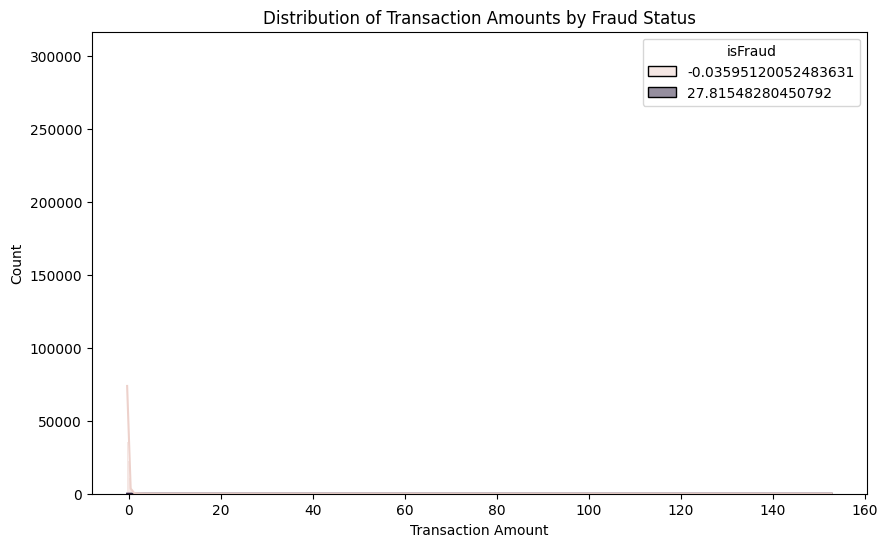

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='amount', hue='isFraud', kde=True)  # Adjust 'isFraud' based on your column name
plt.title('Distribution of Transaction Amounts by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.show()

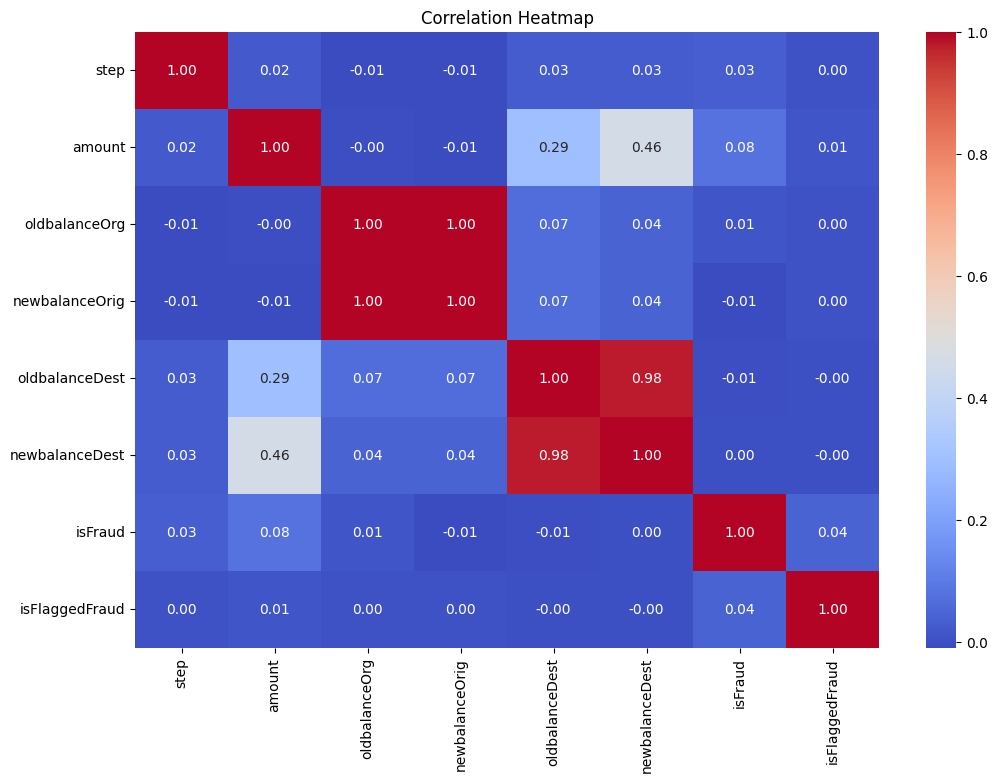

In [ ]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
# Add a feature for transaction size category
df['transaction_size'] = pd.cut(df['amount'], bins=[0, 100, 1000, 10000], labels=['Small', 'Medium', 'Large'])  # Replace 'amount'
print("\nNew Feature 'transaction_size' added:\n", df['transaction_size'].value_counts())


New Feature 'transaction_size' added:
 transaction_size
Small     1876382
Medium         14
Large           0
Name: count, dtype: int64


In [ ]:
df.to_csv('preprocessed_fraud_dataset.csv', index=False)
print("Preprocessed dataset saved as 'preprocessed_fraud_dataset.csv'")
# Download the file
from google.colab import files
files.download('preprocessed_fraud_dataset.csv')

Preprocessed dataset saved as 'preprocessed_fraud_dataset.csv'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#####SUDESHNA EDA

In [ ]:
!pip install numpy==1.26.4 # specific version of numpy library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 85.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [ ]:
import numpy as np
print ("Numpy version:", np.__version__)

Numpy version: 1.26.4


In [ ]:
!pip install opendatasets

In [ ]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset/data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: sudeshnadass
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/sriharshaeedala/financial-fraud-detection-dataset


100%|██████████| 178M/178M [00:00<00:00, 845MB/s] 


In [ ]:
import pandas as pd
df = pd.read_csv("/content/financial-fraud-detection-dataset/Synthetic_Financial_datasets_log.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
print(df.shape)

(6362620, 11)


In [ ]:
print(df.columns)

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [ ]:
print(df.dtypes)

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object


In [ ]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
#Count of fraudulent vs non-fraudulent transactions
fraud_counts = df['isFraud'].value_counts()
print(fraud_counts[0])
print(fraud_counts[1])

6354407
8213


In [ ]:
fraud_percent = (fraud_counts[1] / len(df)) * 100
print(f"\n⚠️ Fraudulent Transactions Percentage: {fraud_percent:.4f}%")



⚠️ Fraudulent Transactions Percentage: 0.1291%


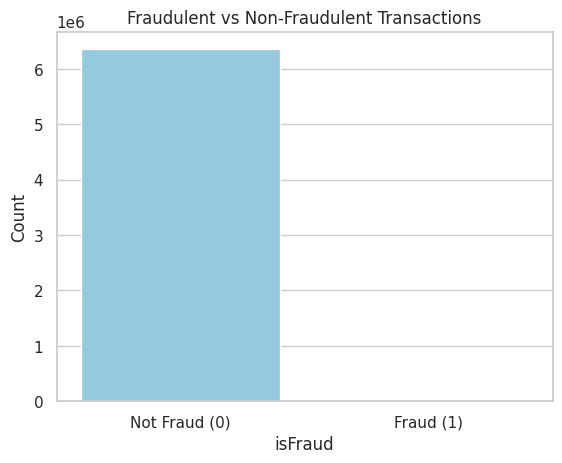

In [ ]:
# Bar chart
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='isFraud', data=df, palette={'0': 'skyblue', '1': 'salmon'})
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])
plt.title("Fraudulent vs Non-Fraudulent Transactions")
plt.xlabel("isFraud")
plt.ylabel("Count")
plt.show()

In [ ]:
# Count of transaction types
print(df['type'].value_counts())


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64


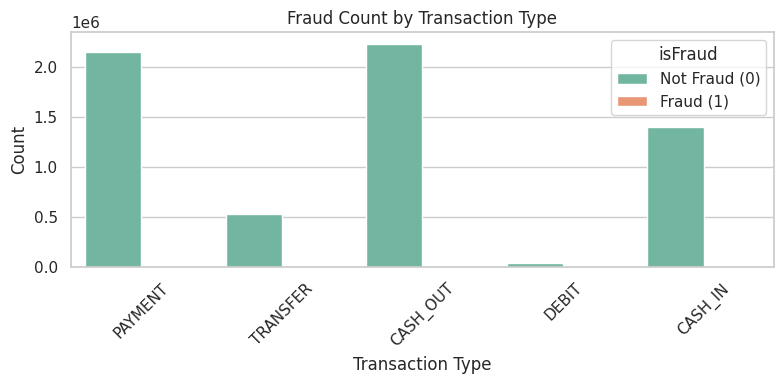

In [ ]:
#Visualize fraud distribution by transaction type
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='type', hue='isFraud', palette='Set2')
plt.title("Fraud Count by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='isFraud', labels=['Not Fraud (0)', 'Fraud (1)'])
plt.tight_layout()
plt.show()

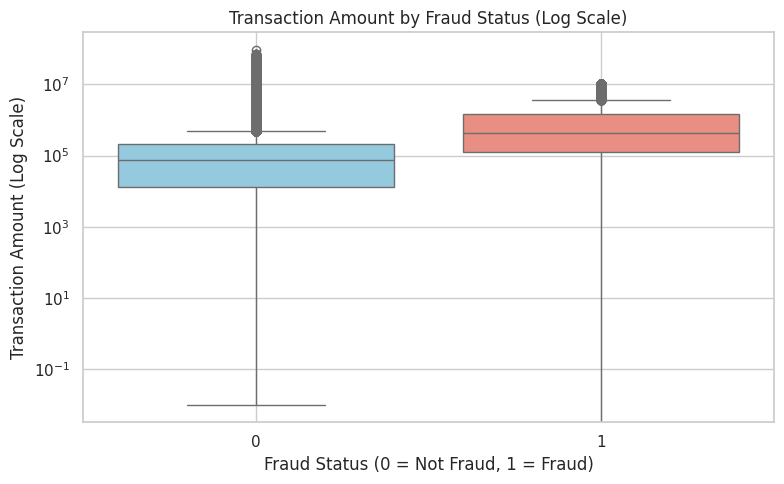

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Boxplot to show amount distribution by fraud status
plt.figure(figsize=(8,5))
sns.boxplot(x='isFraud', y='amount', data=df, palette={'0': 'skyblue', '1': 'salmon'})
plt.yscale('log')  # log scale helps handle extreme outliers
plt.title("Transaction Amount by Fraud Status (Log Scale)")
plt.xlabel("Fraud Status (0 = Not Fraud, 1 = Fraud)")
plt.ylabel("Transaction Amount (Log Scale)")
plt.grid(True)
plt.tight_layout()
plt.show()

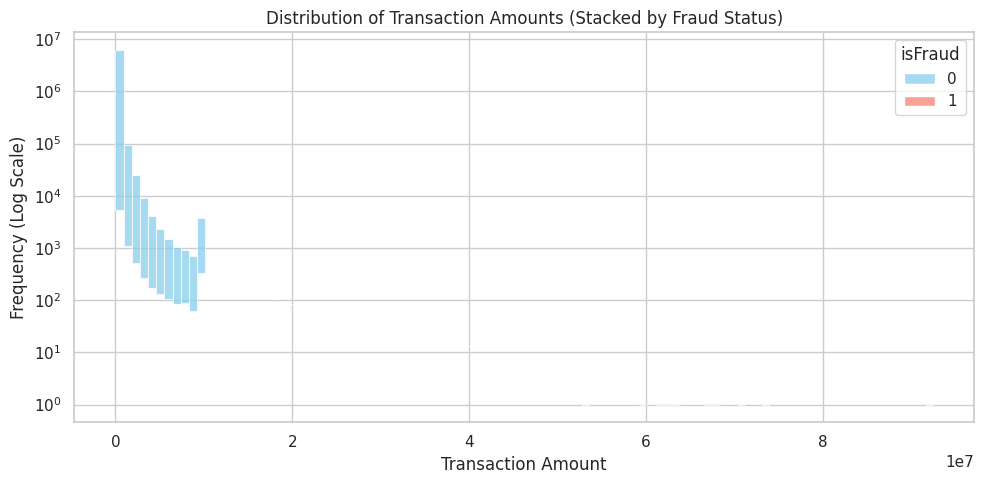

In [ ]:
#Histogram for visual comparison
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='amount', bins=100, hue='isFraud', multiple='stack', palette={0: 'skyblue', 1: 'salmon'}, log_scale=(False, True))
plt.title("Distribution of Transaction Amounts (Stacked by Fraud Status)")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency (Log Scale)")
plt.tight_layout()
plt.show()

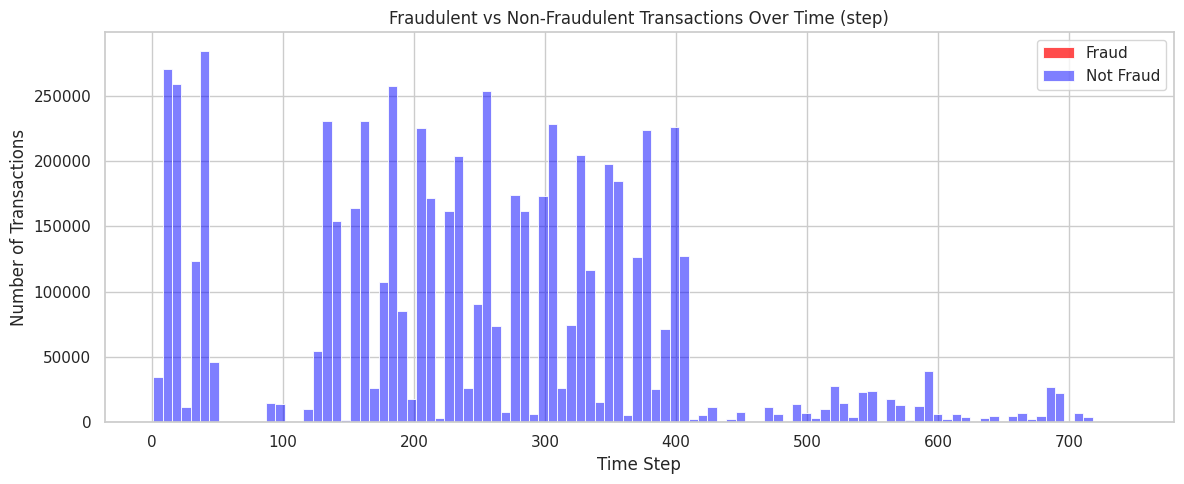

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Check time-based distribution using 'step'
plt.figure(figsize=(12,5))
sns.histplot(data=df[df['isFraud'] == 1], x='step', bins=100, color='red', label='Fraud', alpha=0.7)
sns.histplot(data=df[df['isFraud'] == 0], x='step', bins=100, color='blue', label='Not Fraud', alpha=0.5)
plt.title("Fraudulent vs Non-Fraudulent Transactions Over Time (step)")
plt.xlabel("Time Step")
plt.ylabel("Number of Transactions")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
#Top 10 sender accounts involved in fraud
fraud_origins = df[df['isFraud'] == 1]['nameOrig'].value_counts().head(10)
print(fraud_origins)


nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64


In [ ]:

#Top 10 receiver accounts involved in fraud
fraud_destinations = df[df['isFraud'] == 1]['nameDest'].value_counts().head(10)
print(fraud_destinations)

nameDest
C1193568854    2
C104038589     2
C200064275     2
C1497532505    2
C1601170327    2
C1655359478    2
C2020337583    2
C1653587362    2
C1013511446    2
C2129197098    2
Name: count, dtype: int64


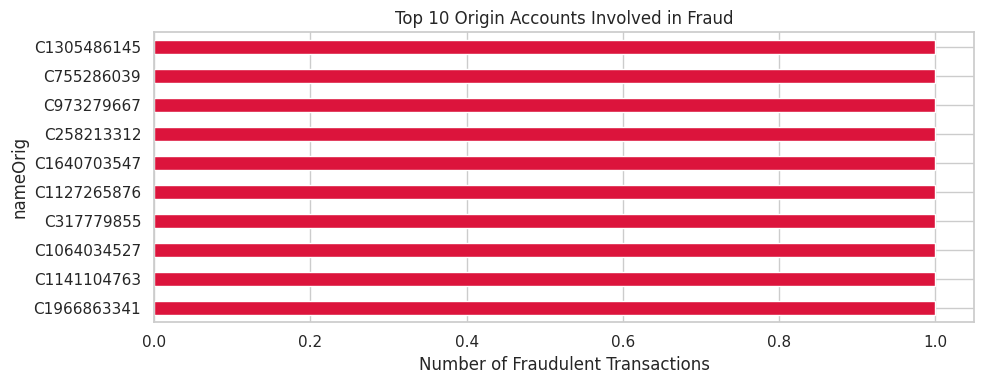

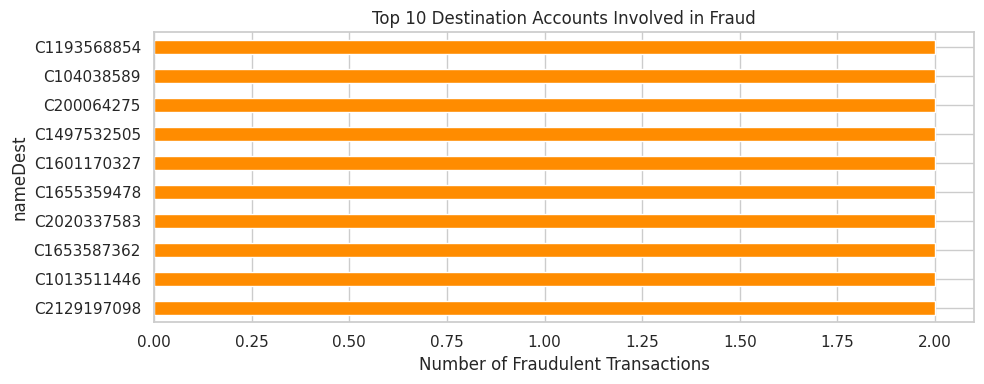

In [ ]:
#visualize as bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
fraud_origins.plot(kind='barh', color='crimson')
plt.title("Top 10 Origin Accounts Involved in Fraud")
plt.xlabel("Number of Fraudulent Transactions")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
fraud_destinations.plot(kind='barh', color='darkorange')
plt.title("Top 10 Destination Accounts Involved in Fraud")
plt.xlabel("Number of Fraudulent Transactions")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


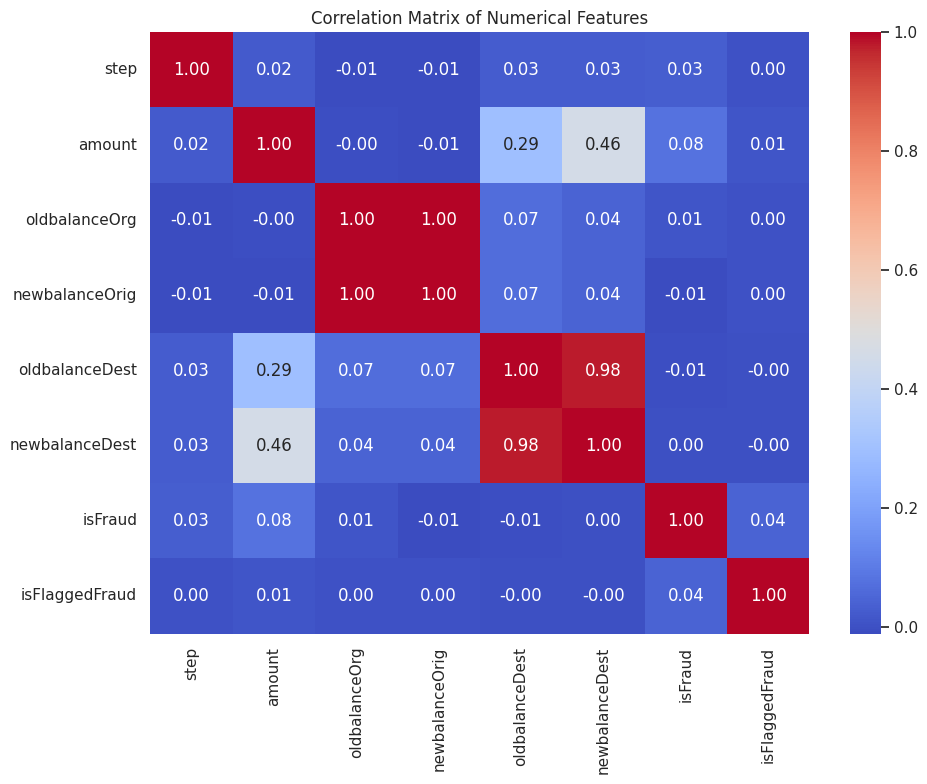

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns before computing correlation matrix
numerical_df = df.select_dtypes(include=[np.number])
corr = numerical_df.corr()

# Display the correlation matrix (optional, but helpful)
display(corr)

# You can then proceed to visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

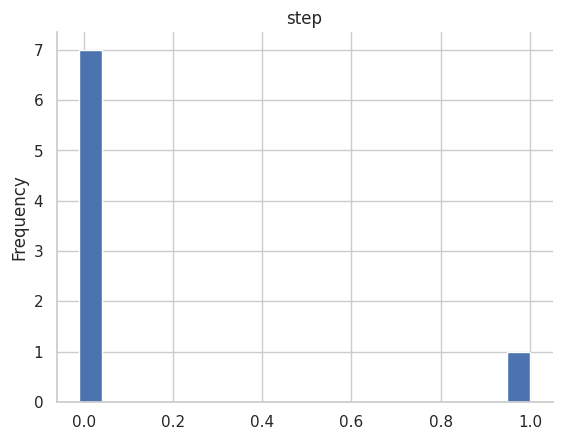

In [ ]:
#title step

from matplotlib import pyplot as plt
corr['step'].plot(kind='hist', bins=20, title='step')
plt.gca().spines[['top', 'right',]].set_visible(False)

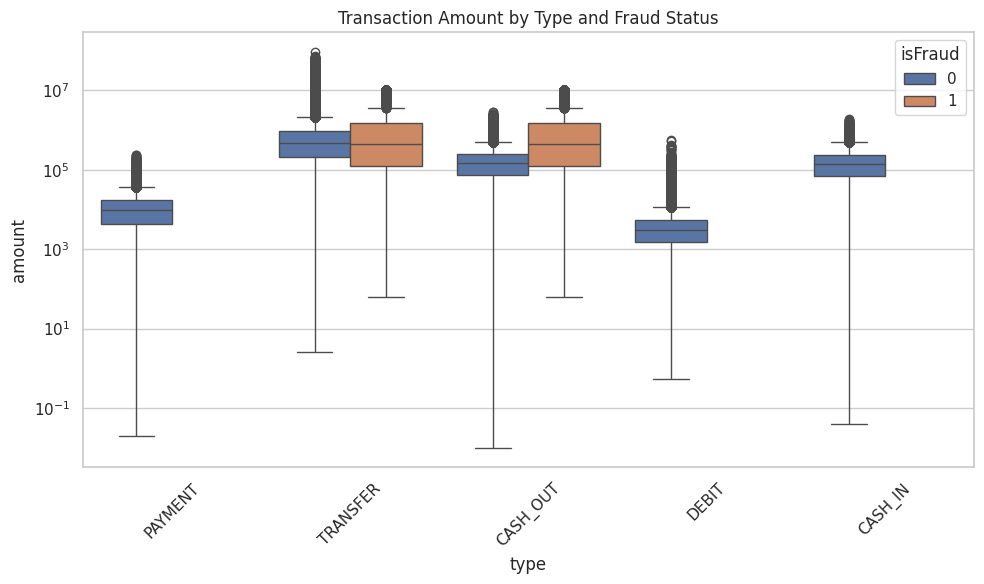

In [ ]:
#Transaction Amount by Type & Fraud
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['amount'] > 0], x='type', y='amount', hue='isFraud')
plt.yscale('log')
plt.title("Transaction Amount by Type and Fraud Status")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

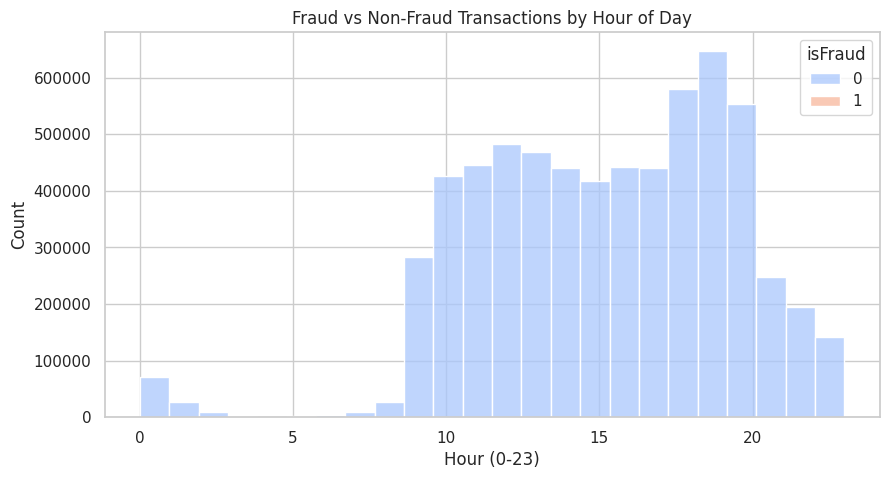

In [ ]:
#Hourly Pattern of Fraud
df['hour'] = df['step'] % 24

plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='hour', hue='isFraud', multiple='stack', bins=24, palette='coolwarm')
plt.title("Fraud vs Non-Fraud Transactions by Hour of Day")
plt.xlabel("Hour (0-23)")
plt.ylabel("Count")
plt.show()

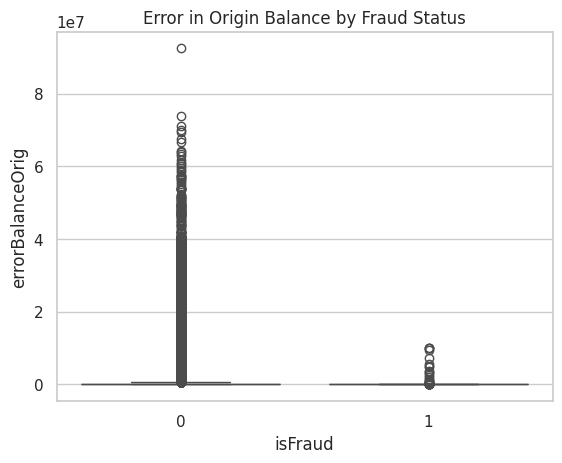

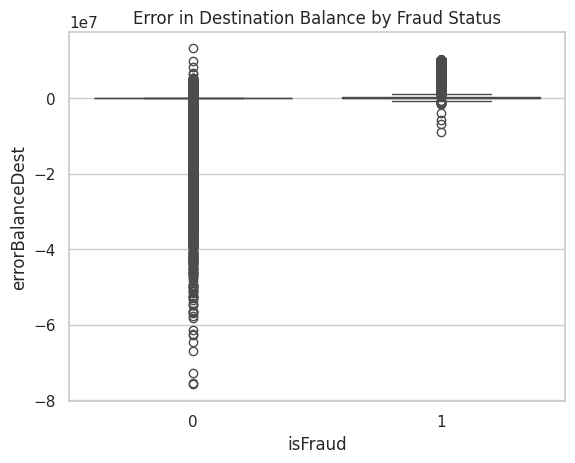

In [ ]:
#Balance Analysis Before & After Transaction
df['errorBalanceOrig'] = df['newbalanceOrig'] + df['amount'] - df['oldbalanceOrg']
df['errorBalanceDest'] = df['oldbalanceDest'] + df['amount'] - df['newbalanceDest']

sns.boxplot(x='isFraud', y='errorBalanceOrig', data=df)
plt.title("Error in Origin Balance by Fraud Status")
plt.show()

sns.boxplot(x='isFraud', y='errorBalanceDest', data=df)
plt.title("Error in Destination Balance by Fraud Status")
plt.show()

In [ ]:
#High-Amount Frauds Detection
high_value_frauds = df[(df['isFraud'] == 1) & (df['amount'] > 1e6)]
print("High-value frauds:\n", high_value_frauds[['type', 'amount', 'nameOrig', 'nameDest']].head())

High-value frauds:
           type       amount     nameOrig     nameDest
969   TRANSFER   1277212.77  C1334405552   C431687661
970   CASH_OUT   1277212.77   C467632528   C716083600
3059  TRANSFER   1096187.24  C1093223281  C2063275841
3060  CASH_OUT   1096187.24    C77163673   C644345897
4440  TRANSFER  10000000.00     C7162498   C945327594


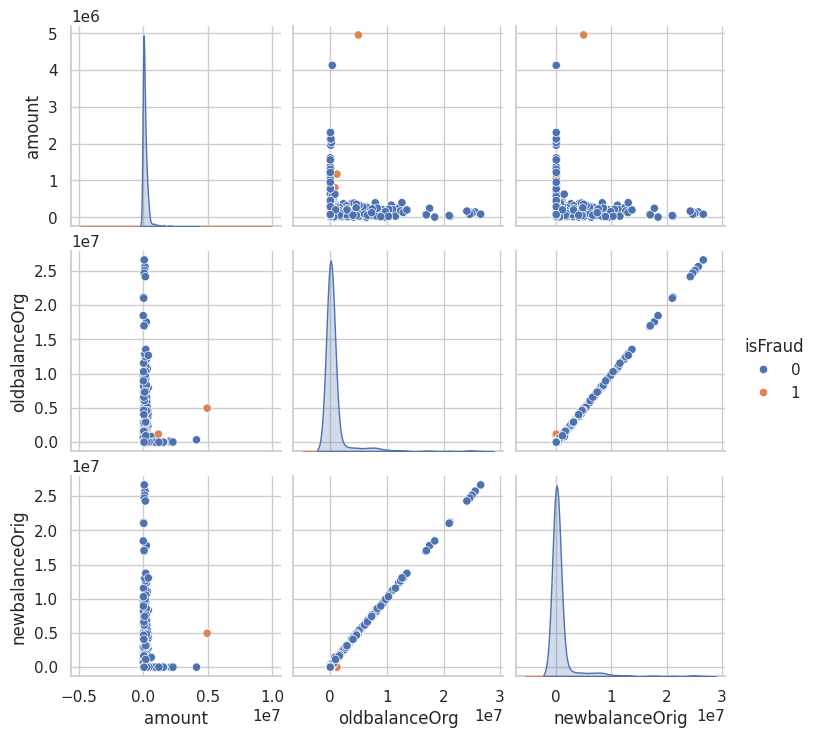

In [ ]:
#Pairplot of Key Features
import seaborn as sns
sample_df = df.sample(1000, random_state=42)  # Limit for performance
sns.pairplot(sample_df, hue='isFraud', vars=['amount', 'oldbalanceOrg', 'newbalanceOrig'])
plt.show()